In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initial Conditions (Gaussian)

In [2]:
def initialPosition1D(xsize, sigma, k_naught, x_init):
    psi = np.zeros([xsize, 3])
    psr = np.zeros_like(psi)
    #psiTot = np.zeros([xsize, 2])
    
    for x in range(0, psi[:,0].size - 1):
        psr[x, 0] = np.exp(-0.5*((x-x_init)/sigma)**2)*np.cos(k_naught*x)
        psi[x, 0] = np.exp(-0.5*((x-x_init)/sigma)**2)*np.sin(k_naught*x)
        #psiTot[x, 0] = np.exp(-0.5*((x-x_init)/sigma)**2)*np.cos(k_naught*x)
    return psr, psi
    #return psiTot


# My attempt at the book's algorithm

In [3]:
xsize = 751
x_init = 400
k_init = 17*np.pi
sigma_0 = 0.5
deltaX = 0.02
deltaT = 0.5*deltaX**2

psr, psi = initialPosition1D(xsize, sigma_0, k_init, x_init)
rho = np.zeros_like(psr[:,0])
rho[0] = rho[xsize-1] = 0.0

t_step = 0.5*deltaT
t = 0
alpha = t_step/(deltaX**2)
numSteps = 1000

plotting_set = np.zeros([numSteps/50, xsize])

for n in range(numSteps):
    psr[1:-1, 1] = psr[1:-1, 0] - 2*(alpha*(psi[2:, 0] + psi[:-2, 0]) - 2*alpha*psi[1:-1, 0])
    psi[1:-1, 1] = psi[1:-1, 0] - 2*(alpha*(psr[2:, 0] + psr[:-2, 0]) - 2*alpha*psr[1:-1, 0])
    
    psi[:, 0] = psi[:, 1]
    psr[:, 0] = psr[:, 1]
    
    t += t_step
    if (n % 50 == 0):
        plotting_set[t, :] = psr[:, 0]

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in subtract
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: overflow encountered in subtract
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in add
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: overflow encountered in add


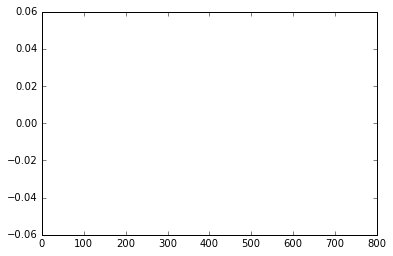

In [4]:
plt.plot(plotting_set[0,:])

# Code Directly from the Book

In [142]:
# initialize wave function , probability , potential
dx = 0.04; dx2 = dx*dx ; k0 = 5.5*np.pi ; dt = dx2 /20.0; xmax = 6.0
xs = np.arange(-xmax,xmax+dx/2 ,dx) # array of x positions 

#g = display ( width=500, height =250, title ='Wave packet in HO Well') 
#PlotObj = curve (x=xs , color=color.yellow , radius =0.1) 

#g.center = (0 ,2 ,0) # center of scene 

psr = np.zeros([xs.size])

# initial condition ; wave packet 
psr = np.exp(-0.5*(xs /0.5)**2)*np.cos(k0*xs) # Re wave function Psi 
psi = np.exp(-0.5*(xs /0.5)**2)*np.sin(k0*xs) # Im wave function Psi 
#v = 15.0*xs**2 
v = 1*xs**2
n = 0

#Stuff I had to add
psi_new = np.zeros_like(psi)
psr_new = np.zeros_like(psr)

psi_old = np.zeros_like(psi)
psr_old = np.zeros_like(psr)

plotting_Set = np.zeros([int(5000/50), xs.size])
prob_Set = np.zeros([int(5000/100), xs.size])
while n < 5000: 
    #rate (500) 
    psr_new[1:-1] = psr[1:-1]-(dt/dx2)*(psi[2:]+ psi[:-2]-2*psi[1:-1])+dt*v[1:-1]*psi[1:-1]
    psi_new[1:-1] = psi[1:-1]+(dt/dx2)*(psr[2:]+ psr[:-2]-2*psr[1:-1])-dt*v[1:-1]*psr[1:-1]
    n += 1
    
    if (n%100):
        #prob_Set[n/100, :] = psr[:]**2 + psi_old[:]*psi_new[:]
        #prob_Set[n/100, :] = psi[:]**2 + psr_old[:]*psr_new[:]
        prob_Set[int(n/100), :] = 4*(psr[:]**2 + psi[:]**2)
    
    #stuff I had to add
    psr_old[:] = psr[:]
    psi_old[:] = psi[:]
    psr[:] = psr_new[:]
    psi[:] = psi_new[:]
    
    if (n % 50):
        plotting_Set[int(n/50), :] = psr_new[:]
        
    #PlotObj.y = 4*(psr**2 + psi**2)

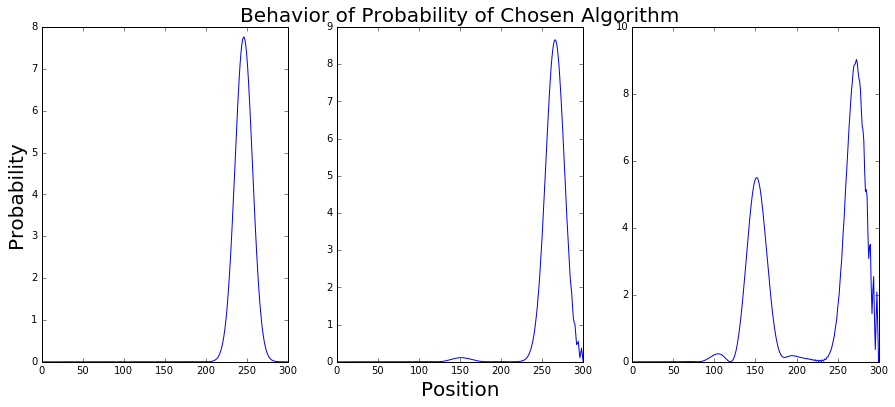

In [152]:
fig = plt.figure(figsize=(15,6))
plt.title('Behavior of Probability of Chosen Algorithm', size=20)
plt.axis('off')
ax1 = fig.add_subplot(131)
ax1.plot(prob_Set[14, :])
ax1.set_ylabel('Probability', size=20)
#ax1.get_xaxis().set_visible(False)
#ax1.get_yaxis().set_visible(False)
ax2 = fig.add_subplot(132)
ax2.plot(prob_Set[17,:])
ax2.set_xlabel('Position', size=20)
#ax2.get_xaxis().set_visible(True)
#ax2.get_yaxis().set_visible(False)
ax3 = fig.add_subplot(133)
ax3.plot(prob_Set[18,:])
#ax3.get_xaxis().set_visible(True)
#ax3.get_yaxis().set_visible(False)

plt.savefig("BoundaryBehavior.jpg")

# My own algorithm attempt

In [35]:
xsize = 751
x_init = 400
k_init = 17*np.pi
sigma_0 = 0.02
deltaX = 0.02
deltaT = 0.5*deltaX**2

psr, psi = initialPosition1D(xsize, sigma_0, k_init, x_init)

rho = np.zeros_like(psi[:,0])
rho[0] = rho[xsize-1] = 0.0
v = np.zeros_like(psi[:,0])

t_step = 0.5*deltaT
t = 0
alpha = t_step/(deltaX**2)
numSteps = 1000

plotting_set = np.zeros([int(numSteps/50), xsize])

probSet = np.zeros([xsize, numSteps])

for n in range(numSteps):
    psi[1:-1,1] = deltaT*((0.5/deltaX**2)*(psr[2:,0] + psr[:-2,0] - 2*psr[1:-1,0]) + v[1:-1]*psr[1:-1,0]) + psi[1:-1,0]
    psr[1:-1,1] = deltaT*((0.5/deltaX**2)*(psi[2:,0] + psi[:-2,0] - 2*psi[1:-1,0]) + v[1:-1]*psi[1:-1,0]) + psr[1:-1,0]
    
    #probSet[:,n] = psi[:,0]**2+psr[:,1]*psr[:,2]
    probSet[:,n] = (psi[:,0] + psr[:,0])**2
    
    psi[:, 2] = psi[:, 0]
    psr[:, 2] = psr[:, 0]
    psi[:, 0] = psi[:, 1]
    psr[:, 0] = psr[:, 1]

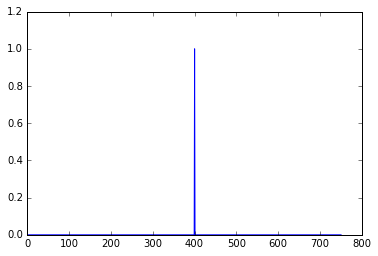

In [36]:
plt.plot(probSet[:,0])

In [39]:
np.linalg.norm(probSet[:,0])

1.0000000000025411